In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Whole Dataset

In [3]:
whole_df = pd.read_csv(r"C:\Users\Baban\Desktop\facial-political-recognition\Results_EDA\whole_dataset.csv")
whole_df

,Group Name,Model,Feature Set,Test AUC,Test Accuracy
0,whole_dataset,NN,Image Features,70.98,64.99
1,whole_dataset,LR,Image Features,71.98,65.80
2,whole_dataset,NN,Image and Self Reported Features,71.98,65.67
3,whole_dataset,LR,Image and Self Reported Features,72.71,66.36
4,whole_dataset,NN,Image and Extracted Features,71.38,65.40
5,whole_dataset,LR,Image and Extracted Features,72.30,66.12
6,whole_dataset,NN,"Image, Self-reported and Extracted Features",71.77,65.75
7,whole_dataset,LR,"Image, Self-reported and Extracted Features",73.04,66.65


In [4]:
whole_df['Feature Set'].unique()

array(['Image Features', 'Image and Self Reported Features',
       'Image and Extracted Features',
       'Image, Self-reported and Extracted Features'], dtype=object)

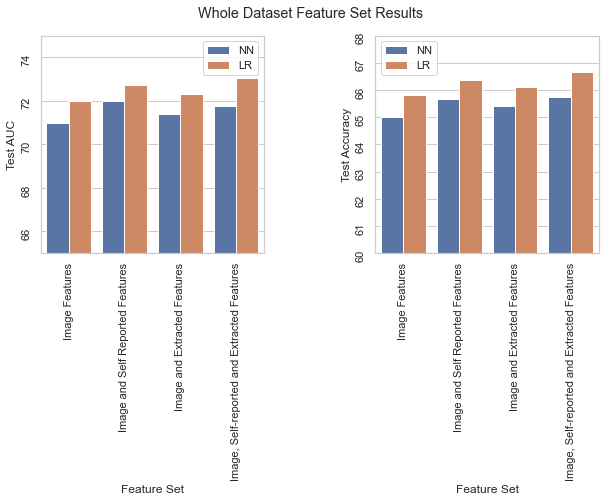

In [5]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(10, 4)
plt.suptitle("Whole Dataset Feature Set Results")
sns.barplot(x='Feature Set',y='Test AUC', data=whole_df, hue='Model', ax=ax1)
sns.barplot(x='Feature Set',y='Test Accuracy', data=whole_df, hue='Model',ax=ax2)
plt.subplots_adjust(wspace=0.5)
ax1.tick_params(rotation = 90)
ax2.tick_params(rotation =90)
ax2.legend(loc = "best" ,ncol=1)
ax1.legend(loc = "best" ,ncol=1)
ax1.set_ylim(65, 75)
ax2.set_ylim(60, 68)
fig.savefig("Results_EDA/Whole dataset.PNG")

# Country Gender DB Segment 

In [6]:
segment_df = pd.read_csv(r"C:\Users\Baban\Desktop\facial-political-recognition\Results_EDA\Country_gender_db_segment.csv")

In [7]:
def change_group_name(group_name):
    return '('+ \
        group_name.\
            replace('0',"Male").\
            replace('1','Female').\
                replace('FB','Facebook').\
                    replace('fb','Facebook').\
                        replace('united states','US').\
                            replace('united kingdom','UK').\
                                replace('dating','Dating').\
                                    replace('asian','Asian').\
                                        replace('black','Black').\
                                            replace('india','Indian').\
                                                replace('white','White').\
                                                    replace('canada','Canada').\
                                    replace("_",", ")\
                                                +')'

In [8]:
segment_df['Group Name'] = segment_df['Group Name'].apply(lambda x : change_group_name(x))
segment_df

,Group Name,Model,Feature Set,Test AUC,Test Accuracy
0,"(US, Female, Facebook)",NN,Image Features,71.79,67.28
1,"(US, Female, Facebook)",LR,Image Features,72.14,67.58
2,"(US, Female, Facebook)",NN,Image and Self Reported Features,72.22,67.63
3,"(US, Female, Facebook)",LR,Image and Self Reported Features,72.16,67.50
4,"(US, Female, Facebook)",NN,Image and Extracted Features,72.34,67.06
...,...,...,...,...,...
59,"(UK, Male, Dating)",LR,Image and Self Reported Features,65.93,61.79
60,"(UK, Male, Dating)",NN,Image and Extracted Features,66.67,60.75
61,"(UK, Male, Dating)",LR,Image and Extracted Features,67.82,63.16
62,"(UK, Male, Dating)",NN,"Image, Self-reported and Extracted Features",67.08,63.18


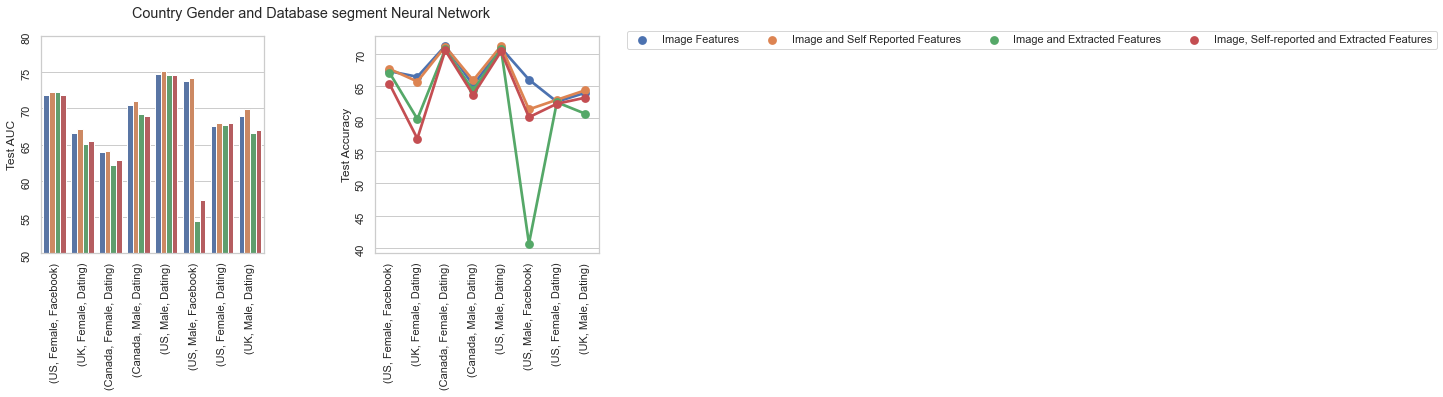

In [9]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(10, 4)
plt.suptitle("Country Gender and Database segment Neural Network")
sns.barplot(hue='Feature Set',y='Test AUC', data=segment_df[segment_df['Model']=="NN"], x='Group Name', ax=ax1)
sns.pointplot(hue='Feature Set',y='Test Accuracy', data=segment_df[segment_df['Model']=="NN"], x='Group Name',ax=ax2)
ax1.get_legend().remove()
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.5)
ax1.tick_params(rotation = 90)
ax2.tick_params(rotation =90)
ax2.legend(bbox_to_anchor=(1.1, 1.05),ncol =4)
ax1.set_ylim(50, 80)
fig.savefig("Results_EDA/segment_groups_NN.PNG")

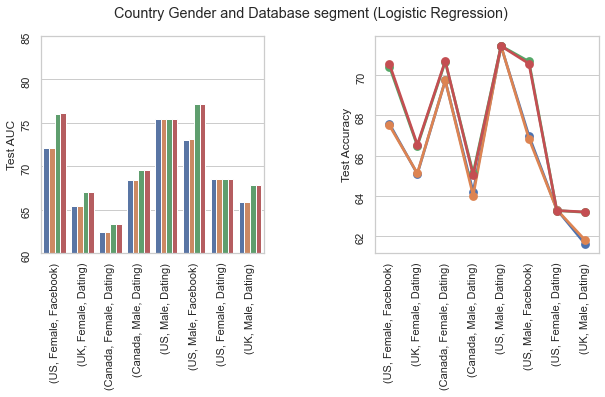

In [10]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(10, 4)
plt.suptitle("Country Gender and Database segment (Logistic Regression)")
sns.barplot(hue='Feature Set',y='Test AUC', data=segment_df[segment_df['Model']=="LR"], x='Group Name', ax=ax1)
sns.pointplot(hue='Feature Set',y='Test Accuracy', data=segment_df[segment_df['Model']=="LR"], x='Group Name',ax=ax2)
# plt.legend(loc='center', bbox_to_anchor=(0.7, -0.53),
#           fancybox=True, shadow=True, ncol=5)
ax2.get_legend().remove()
ax1.get_legend().remove()
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.5)
ax1.tick_params(rotation = 90)
ax2.tick_params(rotation =90)
# ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax1.set_ylim(60, 85)
fig.savefig("Results_EDA/segment_groups_LR.PNG")

# Ethnicity (Top 5 and Bottom 5 segments )

In [12]:
ethnicity_df = pd.read_csv(r"C:\Users\Baban\Desktop\facial-political-recognition\Results_EDA\ethnicity_groups.csv")
ethnicity_df['Group Name'] = ethnicity_df['Group Name'].apply(lambda x : change_group_name(x))
ethnicity_df

,Group Name,Model,Feature Set,Test AUC,Test Accuracy
0,"(US, Female, Facebook, White)",NN,Image Features,64.55,61.21
1,"(US, Female, Facebook, White)",LR,Image Features,64.26,60.65
2,"(US, Female, Facebook, White)",NN,Image and Self Reported Features,64.33,61.10
3,"(US, Female, Facebook, White)",LR,Image and Self Reported Features,64.30,60.82
4,"(US, Female, Facebook, White)",NN,Image and Extracted Features,63.93,60.48
...,...,...,...,...,...
249,"(UK, Male, Dating, Asian)",LR,Image and Self Reported Features,61.36,58.60
250,"(UK, Male, Dating, Asian)",NN,Image and Extracted Features,62.21,60.93
251,"(UK, Male, Dating, Asian)",LR,Image and Extracted Features,63.50,58.14
252,"(UK, Male, Dating, Asian)",NN,"Image, Self-reported and Extracted Features",55.69,56.74


In [13]:
lr_ethnicity = ethnicity_df[ethnicity_df['Model']=='LR']
nn_ethnicity = ethnicity_df[ethnicity_df['Model']=='NN']

# LR MODEL

In [14]:
lr_ethin_df_sorted = lr_ethnicity.sort_values(by = ['Test AUC'])

lr_ethin_df_sorted_top = lr_ethin_df_sorted.tail(5)
lr_ethin_df_sorted_lowest = lr_ethin_df_sorted.head(5)
lr_ethin_df_sorted_lowest.index = ["Bottom","Bottom","Bottom","Bottom","Bottom"]
lr_ethin_df_sorted_top.index = ['Top','Top','Top','Top','Top']
df = pd.concat([lr_ethin_df_sorted_lowest,lr_ethin_df_sorted_top], axis = 0 )

df_low_top = df.sort_values(by=['Test AUC'],ascending=False)
df_low_top.to_csv("Results_EDA/ethnicity group LR.csv")

In [15]:
df_low_top

,Group Name,Model,Feature Set,Test AUC,Test Accuracy
Top,"(US, Female, Facebook, Black)",LR,Image and Extracted Features,84.68,84.67
Top,"(US, Female, Facebook, Black)",LR,"Image, Self-reported and Extracted Features",84.67,84.61
Top,"(US, Male, Facebook, Black)",LR,"Image, Self-reported and Extracted Features",82.66,79.82
Top,"(US, Male, Facebook, Black)",LR,Image and Extracted Features,82.61,79.88
Top,"(US, Female, Facebook, Black)",LR,Image and Self Reported Features,81.18,82.34
Bottom,"(Canada, Female, Dating, Asian)",LR,Image Features,51.99,66.04
Bottom,"(UK, Female, Dating, Indian)",LR,Image and Extracted Features,50.36,69.80
Bottom,"(UK, Female, Dating, Indian)",LR,"Image, Self-reported and Extracted Features",50.29,69.80
Bottom,"(UK, Female, Dating, Indian)",LR,Image and Self Reported Features,48.91,67.79
Bottom,"(UK, Female, Dating, Indian)",LR,Image Features,48.64,65.77


# NN MODEL

In [16]:
lr_ethin_df_sorted = nn_ethnicity.sort_values(by= ['Test AUC'])
lr_ethin_df_sorted_top = lr_ethin_df_sorted.tail(5)
lr_ethin_df_sorted_lowest = lr_ethin_df_sorted.head(5)
lr_ethin_df_sorted_lowest.index = ["Bottom","Bottom","Bottom","Bottom","Bottom"]
lr_ethin_df_sorted_top.index = ['Top','Top','Top','Top','Top']
df = pd.concat([lr_ethin_df_sorted_lowest,lr_ethin_df_sorted_top], axis = 0 )

df_low_top = df.sort_values(by=['Test AUC'],ascending=False)
df_low_top.to_csv("Results_EDA/ethnicity group NN.csv")

In [17]:
df_low_top

,Group Name,Model,Feature Set,Test AUC,Test Accuracy
Top,"(US, Female, Facebook, Black)",NN,Image and Self Reported Features,83.40,83.13
Top,"(US, Female, Facebook, Black)",NN,"Image, Self-reported and Extracted Features",82.87,82.21
Top,"(US, Female, Facebook, Black)",NN,Image Features,82.83,82.24
Top,"(US, Female, Facebook, Black)",NN,Image and Extracted Features,81.92,81.59
Top,"(US, Male, Facebook, Black)",NN,Image and Self Reported Features,81.06,78.94
Bottom,"(UK, Female, Dating, Asian)",NN,Image Features,51.89,69.21
Bottom,"(Canada, Female, Dating, Asian)",NN,Image and Extracted Features,50.81,70.25
Bottom,"(UK, Female, Dating, Indian)",NN,Image and Extracted Features,50.04,71.81
Bottom,"(UK, Female, Dating, Indian)",NN,Image and Self Reported Features,48.55,71.81
Bottom,"(UK, Female, Dating, Indian)",NN,Image Features,47.60,71.81
